In [ ]:
import pandas as pd
import requests
import pandas_ta as ta
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

In [ ]:
def get_historical_data(symbol, start_date, interval):
    url = "https://api.benzinga.com/api/v2/bars"
    querystring = {"token":"","symbols":f"{symbol}","from":f"{start_date}","interval":f"{interval}"}

    hist_json = requests.get(url, params = querystring).json()
    df = pd.DataFrame(hist_json[0]['candles'])

    return df

aapl = get_historical_data('AAPL', '1993-01-01', '1W')
aapl.tail()

,time,open,high,low,close,volume,dateTime
1623,1707696000000,188.415,188.6700,181.35,182.31,268128941,2024-02-12T15:00:00.000-05:00
1624,1708300800000,181.790,185.0400,180.00,182.52,192607112,2024-02-19T15:00:00.000-05:00
1625,1708905600000,182.240,183.9225,177.38,179.66,354385890,2024-02-26T15:00:00.000-05:00
1626,1709510400000,176.150,176.9000,168.49,170.73,393262265,2024-03-04T15:00:00.000-05:00
1627,1710115200000,172.940,174.3800,171.01,172.51,122506972,2024-03-11T16:00:00.000-04:00


In [ ]:
aapl[['dcl', 'dcm', 'dcu']] = aapl.ta.donchian(lower_length = 40, upper_length = 50)
aapl = aapl.dropna().drop('time', axis = 1).rename(columns = {'dateTime':'date'})
aapl = aapl.set_index('date')
aapl.index = pd.to_datetime(aapl.index)

aapl.tail()

,open,high,low,close,volume,dcl,dcm,dcu
date,,,,,,,,
2024-02-12 15:00:00-05:00,188.415,188.6700,181.35,182.31,268128941,165.67,182.645,199.62
2024-02-19 15:00:00-05:00,181.790,185.0400,180.00,182.52,192607112,165.67,182.645,199.62
2024-02-26 15:00:00-05:00,182.240,183.9225,177.38,179.66,354385890,165.67,182.645,199.62
2024-03-04 15:00:00-05:00,176.150,176.9000,168.49,170.73,393262265,165.67,182.645,199.62
2024-03-11 16:00:00-04:00,172.940,174.3800,171.01,172.51,122506972,165.67,182.645,199.62


Text(0, 0.5, 'Close')

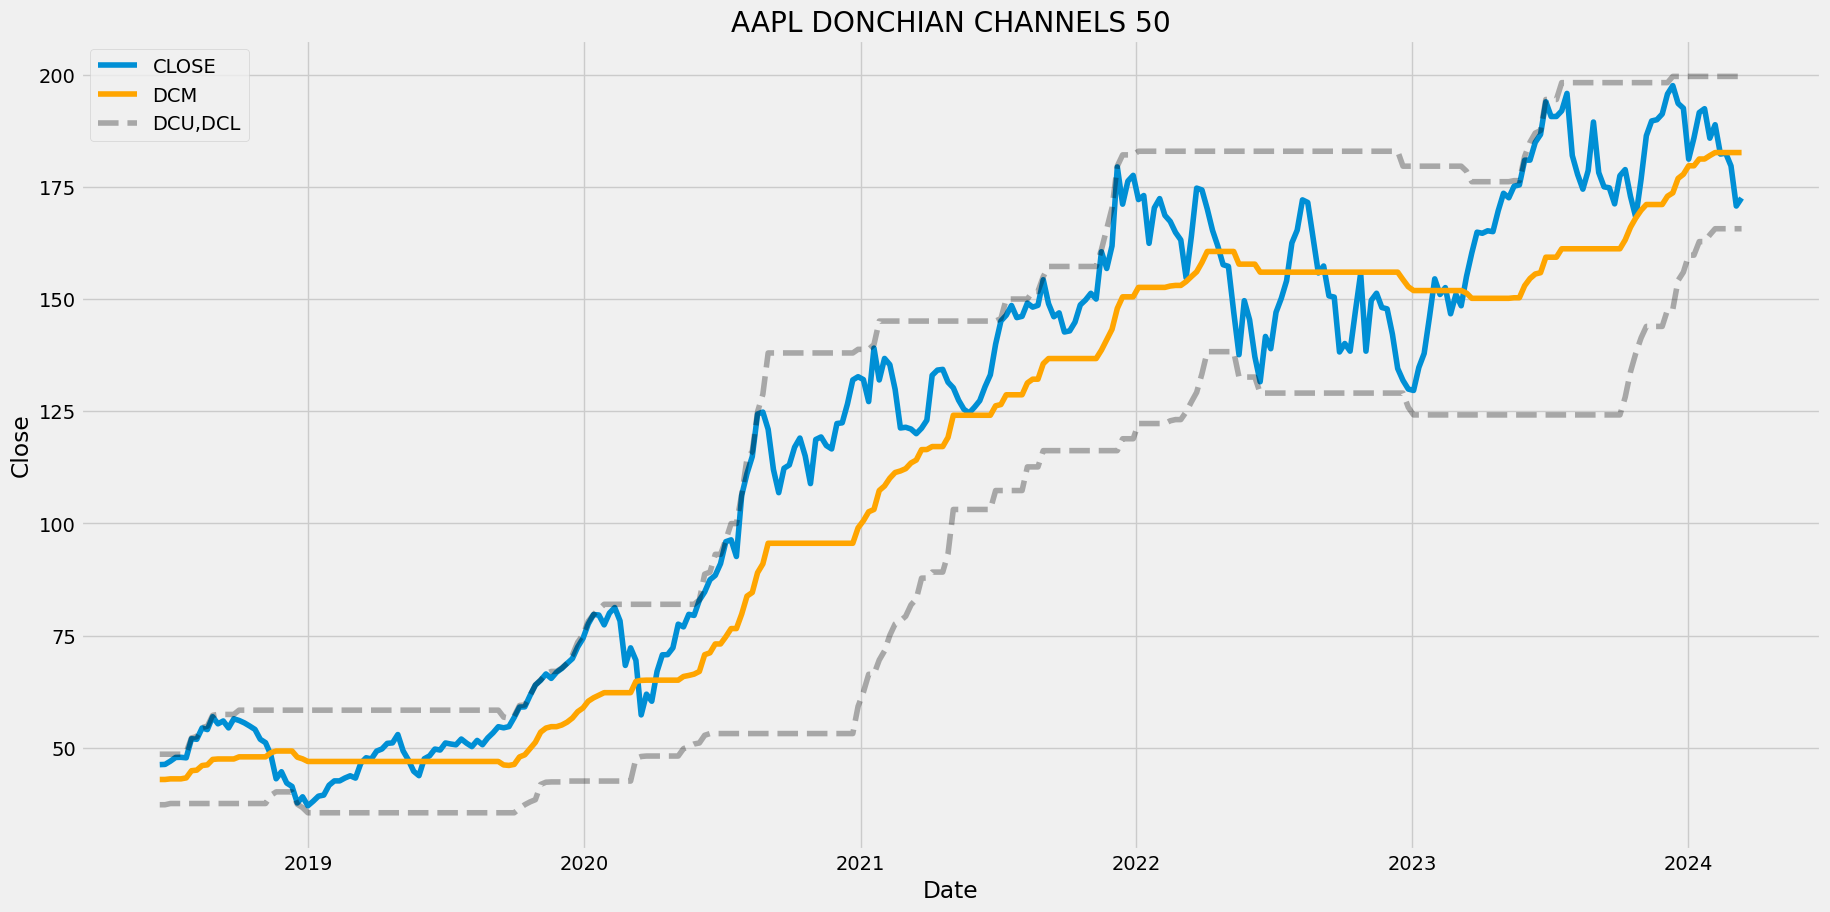

In [ ]:
plt.plot(aapl[-300:].close, label = 'CLOSE')
plt.plot(aapl[-300:].dcl, color = 'black', linestyle = '--', alpha = 0.3)
plt.plot(aapl[-300:].dcm, color = 'orange', label = 'DCM')
plt.plot(aapl[-300:].dcu, color = 'black', linestyle = '--', alpha = 0.3, label = 'DCU,DCL')
plt.legend()
plt.title('AAPL DONCHIAN CHANNELS 50')
plt.xlabel('Date')
plt.ylabel('Close')

In [ ]:
def implement_strategy(aapl, investment):

    in_position = False
    equity = investment

    for i in range(3, len(aapl)):
        if aapl['high'][i] == aapl['dcu'][i] and in_position == False:
            no_of_shares = math.floor(equity/aapl.close[i])
            equity -= (no_of_shares * aapl.close[i])
            in_position = True
            print(cl('BUY: ', color = 'green', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.close[i]} on {str(aapl.index[i])[:10]}')
        elif aapl['low'][i] == aapl['dcl'][i] and in_position == True:
            equity += (no_of_shares * aapl.close[i])
            in_position = False
            print(cl('SELL: ', color = 'red', attrs = ['bold']), f'{no_of_shares} Shares are bought at ${aapl.close[i]} on {str(aapl.index[i])[:10]}')
    if in_position == True:
        equity += (no_of_shares * aapl.close[i])
        print(cl(f'\nClosing position at {aapl.close[i]} on {str(aapl.index[i])[:10]}', attrs = ['bold']))
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f'EARNING: ${earning} ; ROI: {roi}%', attrs = ['bold']))

implement_strategy(aapl, 100000)

BUY:  272340 Shares are bought at $0.3671875 on 1994-10-10
SELL:  272340 Shares are bought at $0.3214285714285715 on 1995-10-09
BUY:  365659 Shares are bought at $0.2393975 on 1997-08-04
SELL:  365659 Shares are bought at $0.14508927678571426 on 1997-12-29
BUY:  212688 Shares are bought at $0.24944215178571424 on 1998-04-13
SELL:  212688 Shares are bought at $0.4598215 on 2000-09-25
BUY:  219244 Shares are bought at $0.4460715 on 2002-04-15
SELL:  219244 Shares are bought at $0.267142857142857 on 2002-07-15
BUY:  170827 Shares are bought at $0.342857142857143 on 2003-06-16
SELL:  170827 Shares are bought at $3.46678575 on 2008-09-29
BUY:  97991 Shares are bought at $6.04357142857143 on 2009-08-17
SELL:  97991 Shares are bought at $18.20692857142857 on 2012-12-10
BUY:  89836 Shares are bought at $19.85964285714286 on 2013-11-25
SELL:  89836 Shares are bought at $28.3225 on 2015-08-24
BUY:  85496 Shares are bought at $29.76 on 2017-01-09
SELL:  85496 Shares are bought at $37.6825 on 2018